# TF NNs

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalisation
X_train = X_train / 255
X_test = X_test / 255

def createY(y):
    Y = np.zeros(10)
    Y[y] = 1
    return Y

# reshape
X_train = X_train.reshape(60000, 28 ** 2)
X_test = X_test.reshape(10000, 28 ** 2)
y_train = np.array([createY(y) for y in y_train])
y_test =np.array([createY(y) for y in y_test])

In [84]:
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras import Model

# Use tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)


In [90]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model_history = model.fit(
    train_ds,
    epochs=6,
    validation_data=test_ds,
)

Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2050 - categorical_accuracy: 0.9393 - val_loss: 0.1059 - val_categorical_accuracy: 0.9675
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0876 - categorical_accuracy: 0.9720 - val_loss: 0.0867 - val_categorical_accuracy: 0.9727
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0602 - categorical_accuracy: 0.9814 - val_loss: 0.0896 - val_categorical_accuracy: 0.9740
Epoch 4/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0443 - categorical_accuracy: 0.9854 - val_loss: 0.0810 - val_categorical_accuracy: 0.9774
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0369 - categorical_accuracy: 0.9878 - val_loss: 0.0921 - val_categorical_accuracy: 0.9740
Epoch 6/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0294 - categorical_accuracy: 0.9903 - val_loss: 0.0867 - val_categorical_accuracy: 0.977

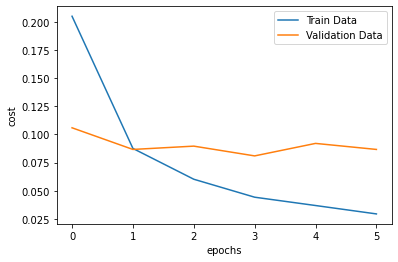

In [93]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label="Train Data")
plt.plot(model_history.history['val_loss'], label="Validation Data")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

prediction: 2


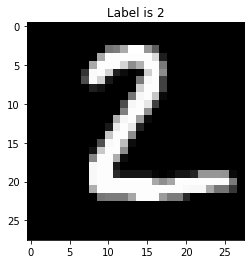

In [103]:
index = 1

image = X_test[index]

haty = model.predict(image.reshape(1, 784))

print('prediction: {label}'.format(label = np.argmax(haty)))

plt.title('Label is {label}'.format(label=np.argmax(y_test[index])))
plt.imshow(image.reshape((28, 28)), cmap='gray')
plt.show()